# Decision Tree

In [1]:
import pandas as pd
df = pd.read_csv('Smoking Data.csv.csv')

In [2]:
df

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no
...,...,...,...,...,...,...
1333,northwest,50,male,30.970,3,no
1334,northeast,18,female,31.920,0,no
1335,southeast,18,female,36.850,0,no
1336,southwest,21,female,25.800,0,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   region    1338 non-null   object 
 1   age       1338 non-null   int64  
 2   sex       1338 non-null   object 
 3   bmi       1338 non-null   float64
 4   children  1338 non-null   int64  
 5   smoker    1338 non-null   object 
dtypes: float64(1), int64(2), object(3)
memory usage: 62.8+ KB


# Getting Featurs & Target

In [4]:
x = df.drop('smoker', axis='columns')

In [5]:
y = df['smoker']

In [6]:
x.head()

,region,age,sex,bmi,children
0,southwest,19,female,27.900,0
1,southeast,18,male,33.770,1
2,southeast,28,male,33.000,3
3,northwest,33,male,22.705,0
4,northwest,32,male,28.880,0


In [7]:
y.head()

0    yes
1     no
2     no
3     no
4     no
Name: smoker, dtype: object

# Encoding

In [8]:
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.preprocessing import LabelEncoder
for col in x.columns:
    if is_numeric_dtype(x[col]):
        continue
    else:
        le = LabelEncoder()
        x[col] = le.fit_transform(x[col])

In [9]:
x.head()

,region,age,sex,bmi,children
0,3,19,0,27.900,0
1,2,18,1,33.770,1
2,2,28,1,33.000,3
3,1,33,1,22.705,0
4,1,32,1,28.880,0


# Traing & Testing Process 70:30

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x,y, test_size=.30, random_state=42)

# Decision Tree Classifier

In [11]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

### Fitting the model

In [12]:
clf.fit(x_train,y_train)  # fitting the model by x & y trained data

DecisionTreeClassifier()

### Testing the model

In [13]:
pred = clf.predict(x_test)
pred

array(['no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'yes', 'yes', 'no', 'yes', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no',
       'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no',
       'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no',
       'yes', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'no',

In [14]:
df_pred = pd.DataFrame(pred, columns=["Prediction_Smoker_Yes or No"])
df_pred.head()

,Prediction_Smoker_Yes or No
0,no
1,no
2,no
3,no
4,no


# Performance Evaluation

In [15]:
clf.score(x_test,y_test)  # Performane evaluation by Test Value

0.6791044776119403

# Tree Visualization

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(303.5466456752969, 213.0912, 'X[3] <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(280.7737135141821, 204.3936, 'X[3] <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(249.36188613126652, 195.696, 'X[3] <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(247.94848243733512, 186.9984, 'X[3] <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(217.01474851583114, 178.3008, 'X[3] <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(196.75435191292877, 169.60320000000002, 'X[3] <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(176.0212104221636, 160.9056, 'X[3] <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(145.86215699208444, 152.208, 'X[4] <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(104.84584432717679, 143.5104, 'X[1] <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(48.03364116094987, 134.81279999999998, 'X[0] <= 0.5\ngini = 0.

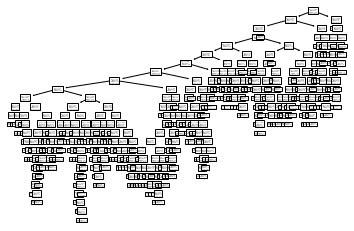

In [17]:
tree.plot_tree(clf)   

In [18]:
x_features = x.columns

[Text(607.0932913505937, 745.8191999999999, 'bmi <= 40.532\ngini = 0.33\nsamples = 936\nvalue = [741, 195]'),
 Text(561.5474270283642, 715.3775999999999, 'bmi <= 37.085\ngini = 0.324\nsamples = 891\nvalue = [710, 181]'),
 Text(498.72377226253303, 684.9359999999999, 'bmi <= 37.06\ngini = 0.337\nsamples = 807\nvalue = [634, 173]'),
 Text(495.89696487467023, 654.4943999999999, 'bmi <= 34.102\ngini = 0.335\nsamples = 805\nvalue = [634, 171]'),
 Text(434.0294970316623, 624.0527999999999, 'bmi <= 32.933\ngini = 0.321\nsamples = 683\nvalue = [546, 137]'),
 Text(393.50870382585754, 593.6111999999999, 'bmi <= 32.425\ngini = 0.333\nsamples = 621\nvalue = [490, 131]'),
 Text(352.0424208443272, 563.1696, 'bmi <= 31.808\ngini = 0.326\nsamples = 600\nvalue = [477, 123]'),
 Text(291.7243139841689, 532.728, 'children <= 2.5\ngini = 0.336\nsamples = 561\nvalue = [441, 120]'),
 Text(209.69168865435358, 502.28639999999996, 'age <= 47.5\ngini = 0.32\nsamples = 470\nvalue = [376, 94]'),
 Text(96.0672823218

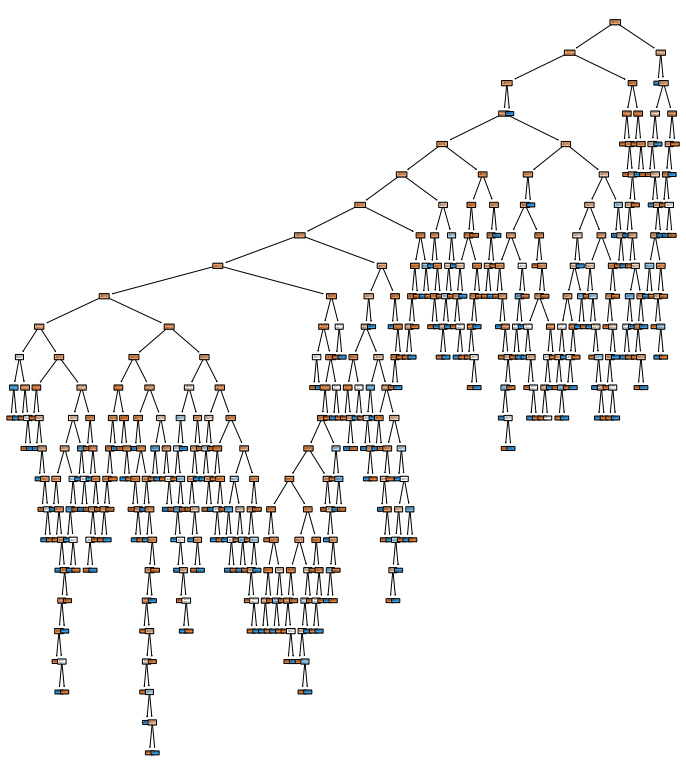

In [28]:
plt.figure(figsize=(12,14))
tree.plot_tree(clf,filled=True,rounded=True,feature_names=x_features)